In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

In [2]:
!pip install wordcloud

In [3]:
df = pd.read_csv(r"C:\Users\YATI\Downloads\indian_food.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
df.head(20)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [6]:
#replacing -1 with 0, where ever -1 is a numerical type
df = df.replace(to_replace = -1, value = 0 )

In [7]:
#we can see all the values that were -1 in prep_time and cook_time have been converted to 0
df[['prep_time', 'cook_time']]

,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40
...,...,...
250,5,30
251,20,60
252,0,0
253,20,45


In [8]:
# this will replace all the values -1 as strings
df['region'] = df['region'].str.replace('-1','not specified')
df['state'] = df['state'].str.replace('-1','not specified')
df['flavor_profile'] = df['flavor_profile'].str.replace('-1','not specified')

In [9]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [10]:
#we have one NaN value in region column we will convert it also to 'not specified'
df['region'].fillna('not specified', inplace=True)

In [11]:
#let's again check the data for null values
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

#Correlation
correlation between cook time and prep time

In [13]:
df.sort_values(by="prep_time", ascending=False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,not specified,main course,Kerala,South
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,not specified,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,not specified,South


In [14]:
corr_matrix = df.corr()
# Print the correlation matrix
print(corr_matrix)

           prep_time  cook_time
prep_time   1.000000   0.142407
cook_time   0.142407   1.000000


In [15]:
x = df['prep_time']
y = df['cook_time']

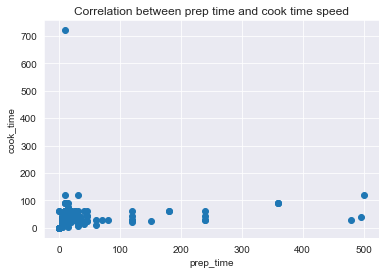

In [16]:
plt.scatter(x, y)
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.title('Correlation between prep time and cook time speed')
plt.show()

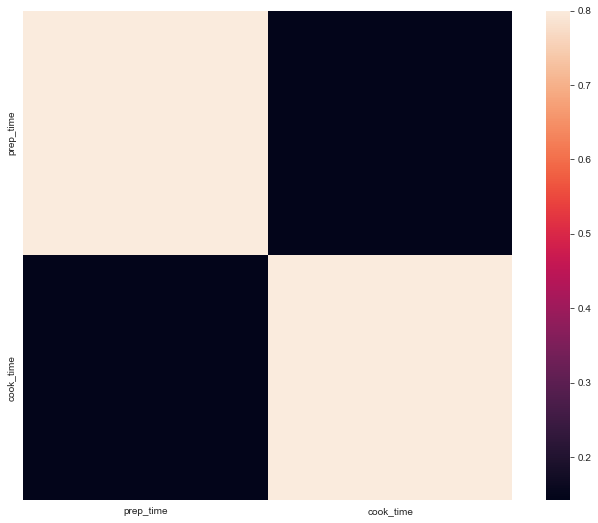

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

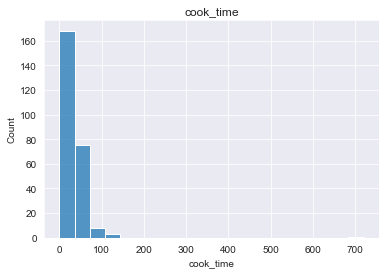

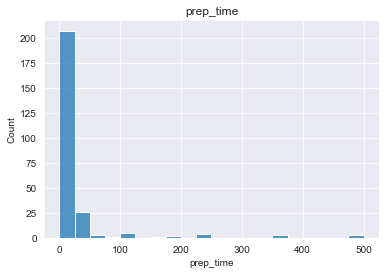

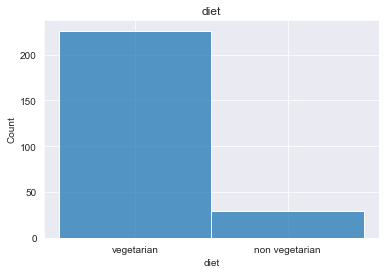

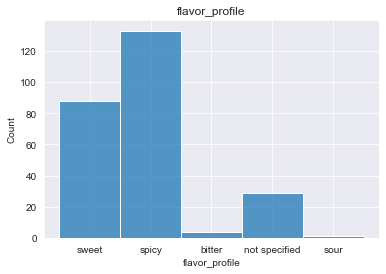

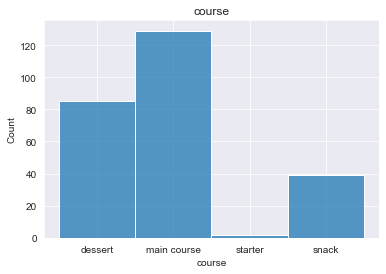

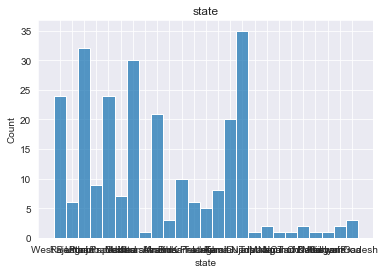

In [18]:
interesting_columns = ['cook_time', 'prep_time', 'diet', 'flavor_profile','course','state']
for col in interesting_columns:
    sns.histplot(x=col, data=df, bins=20)
    plt.title(col)
    plt.show()

    print('\n')

count    255.000000
mean      34.639216
std       48.185452
min        0.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64


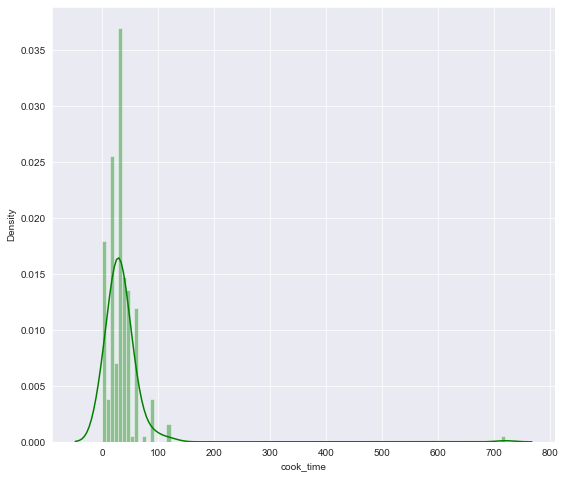

In [19]:
print(df['cook_time'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['cook_time'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40


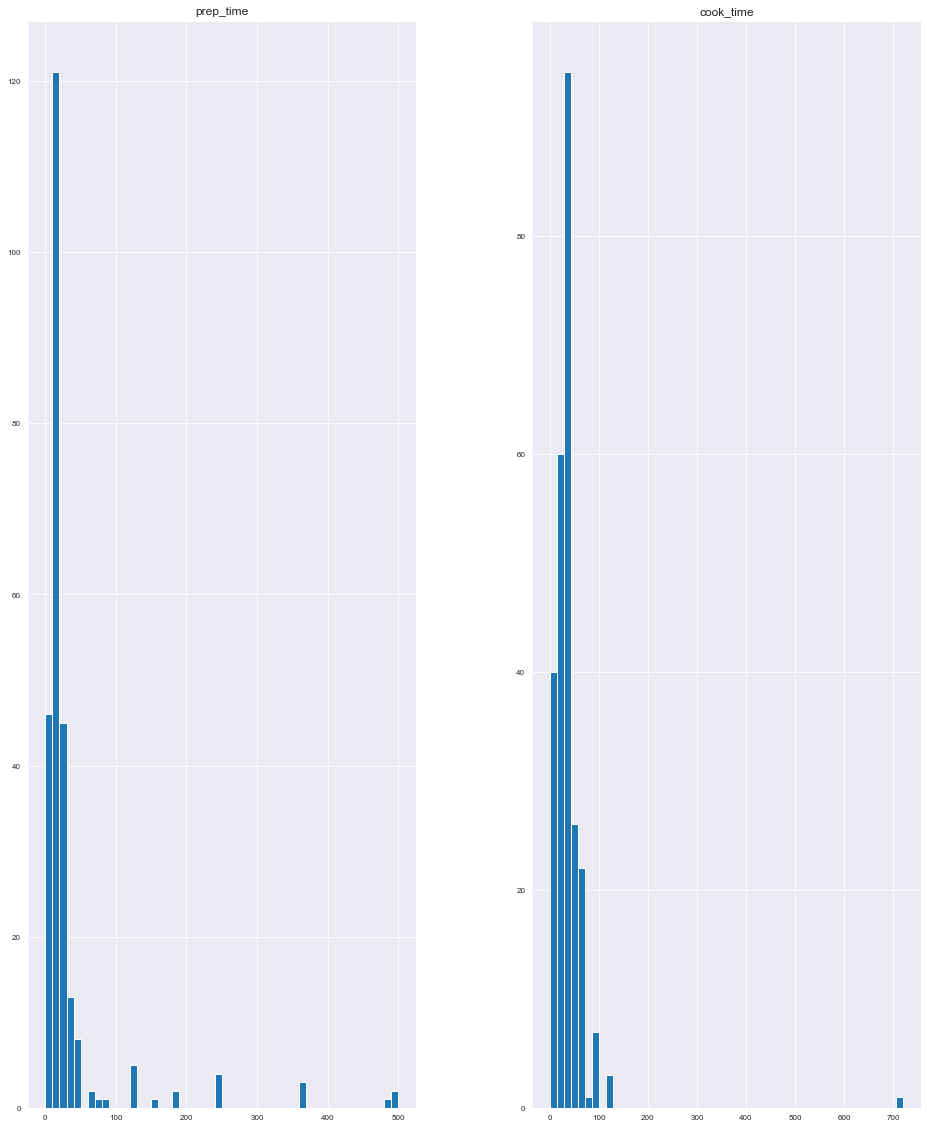

In [21]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


## 1. Is indian food primarily Vegetarian or Non Vegetarian?

We plotted a bar chart to compare vegetarian vs non vegetarian food items.

In [22]:
#counting vegetarian and non vegetarian dishes for bar chart
veg_nonveg = df.diet.value_counts()
veg_nonveg

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

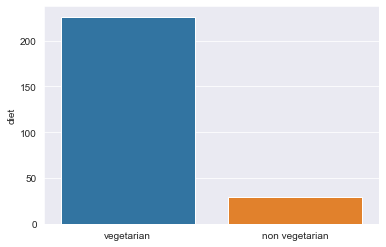

In [23]:
sns.barplot(x = veg_nonveg.index, y = veg_nonveg);

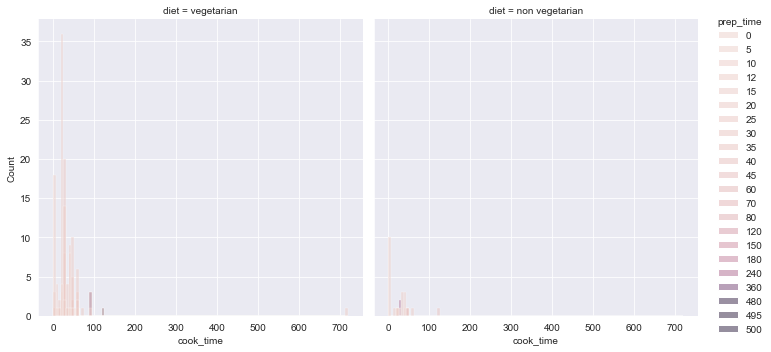

In [24]:
#time taken to cook diet wise
sns.displot(x='cook_time', hue='prep_time', col='diet', data=df)
plt.show()

## Conclusion

Indian food is primarily Vegetarian.

## 2. Which region has the most variety of food in India?

I plotted a pie chart to find the answer.

In [25]:
#counting region wise dishes
region_values = df.region.value_counts()

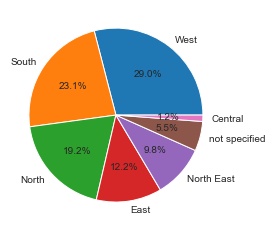

In [26]:
plt.pie(region_values, labels = region_values.index, autopct='%1.1f%%');

## Conclusion

West region of India has most variety of dishes in dataset.

## 3. Top 10 dishes which takes most time to prepare.

Firstly, I added a new column to calculated total_time = prep_time + cook_time. And then used sort_values to find the most time consuming dishes.

In [27]:
df['total_time'] = df['prep_time']+ df['cook_time']
df['total_time']

0       70
1      110
2       75
3       45
4       55
      ... 
250     35
251     80
252      0
253     65
254      0
Name: total_time, Length: 255, dtype: int64

In [28]:
df.sort_values('total_time', ascending = False).head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,not specified,main course,Kerala,South,535
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,not specified,South,450
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,not specified,South,450
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,not specified,South,450
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South,300
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East,285
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270


**Conclusion**
As we can see Shrikhand takes most time and given above dishes takes most time to prepare out of all the given dishes.

## 4. Which dish requires the most number of ingredients to make?

I first added a column which converted the ingredients into a list and then I added another column which calculates the length of the corresponding ingredients list.

In [29]:
df['ing_list'] = df['ingredients'].apply(lambda x: x.split(', '))
df['ing_list']

0                      [Maida flour, yogurt, oil, sugar]
1                              [Gram flour, ghee, sugar]
2         [Carrots, milk, sugar, ghee, cashews, raisins]
3      [Flour, ghee, kewra, milk, clarified butter, s...
4      [Milk powder, plain flour, baking powder, ghee...
                             ...                        
250            [Glutinous rice, black sesame seeds, gur]
251    [Coconut milk, egg yolks, clarified butter, al...
252    [Cottage cheese, dry dates, dried rose petals,...
253    [Milk powder, dry fruits, arrowroot powder, al...
254    [Brown rice, fennel seeds, grated coconut, bla...
Name: ing_list, Length: 255, dtype: object

In [30]:
df['no_of_ing']= df.ing_list.str.len()
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,"[Milk powder, plain flour, baking powder, ghee...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,35,"[Glutinous rice, black sesame seeds, gur]",3
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,80,"[Coconut milk, egg yolks, clarified butter, al...",4
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,0,0,sweet,dessert,Jammu & Kashmir,North,0,"[Cottage cheese, dry dates, dried rose petals,...",5
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,65,"[Milk powder, dry fruits, arrowroot powder, al...",4


In [31]:
df.sort_values('no_of_ing', ascending = False).head(1)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10


## Conclusion

Ghevar requires most no. of ingredients than other dishes

## 5. Comparing cook time and prep time of dishes using scatter plot?

Using a scatter plot to generate a valuable insight between prep time and cook time.

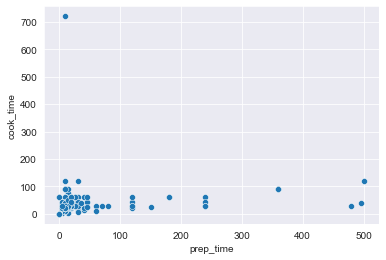

In [32]:
sns.scatterplot(x = df.prep_time, y = df.cook_time);

## Conclusion

1. Most dishes' cooktime is less then 150 mins with one exception which takes more than 700 minutes to cook.
2. whereas preptime has high variability

## 6. Which flavor profile food takes usually maximum time to prepare?

Using line chart to see that on average which type of food will take most time to prepare.

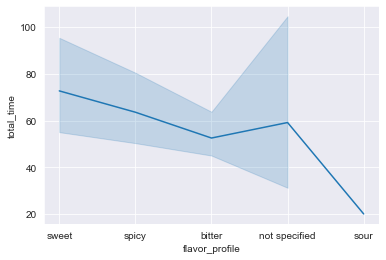

In [33]:
sns.lineplot(x='flavor_profile', y='total_time', data=df);

## Conclusion
On average the desserts or sweet foods are the most time consuming foods to prepare.

## 7. Flavor wise breakdown of food items using piechart.

In [34]:
flavor_values = df.flavor_profile.value_counts()

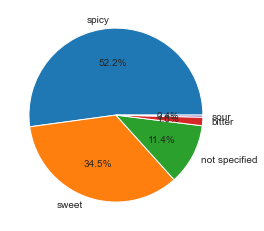

In [35]:
plt.pie(flavor_values, labels = flavor_values.index, autopct='%1.1f%%');

## Conclusion

Indian foods are majorily spicy.

## 8. What meal(main course, starter etc.) is the Indian food considered primarily?

In [36]:
course_values = df.course.value_counts()

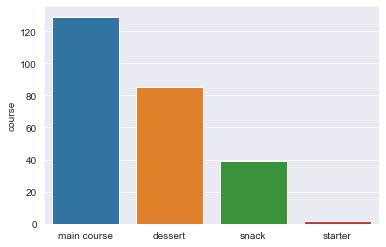

In [37]:
sns.barplot(x = course_values.index, y = course_values);

## Conclusion

Indian food is mostly a main course meal, followed by dessert.

# **Decision Tree**

In [38]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,"[Milk powder, plain flour, baking powder, ghee...",8


In [39]:
df1=df[['prep_time','cook_time','name','flavor_profile','diet']]
df1.head()

,prep_time,cook_time,name,flavor_profile,diet
0,45,25,Balu shahi,sweet,vegetarian
1,80,30,Boondi,sweet,vegetarian
2,15,60,Gajar ka halwa,sweet,vegetarian
3,15,30,Ghevar,sweet,vegetarian
4,15,40,Gulab jamun,sweet,vegetarian


In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df1=df1.apply(LabelEncoder().fit_transform)

In [41]:
df1.head()

,prep_time,cook_time,name,flavor_profile,diet
0,10,7,13,4,1
1,13,8,27,4,1
2,4,14,71,4,1
3,4,8,76,4,1
4,4,10,80,4,1


In [42]:
df2 = df1.reindex(columns=['prep_time','cook_time','name','diet','flavor_profile'])
df2.head()

,prep_time,cook_time,name,diet,flavor_profile
0,10,7,13,1,4
1,13,8,27,1,4
2,4,14,71,1,4
3,4,8,76,1,4
4,4,10,80,1,4


In [43]:
X=df2.iloc[:,:-1] 
feature_cols=['prep_time','cook_time','name','diet']
Y=df2.iloc[:,4].values

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
X
regressor.fit(X,Y)

X_in=np.array([2,0,1,1])
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)

Prediction:  [3]


In [45]:
X_inn=X_in.reshape(1,-1)

|--- diet <= 0.50
|   |--- name <= 25.50
|   |   |--- name <= 19.50
|   |   |   |--- class: 3
|   |   |--- name >  19.50
|   |   |   |--- prep_time <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- prep_time >  4.50
|   |   |   |   |--- class: 3
|   |--- name >  25.50
|   |   |--- prep_time <= 3.00
|   |   |   |--- class: 3
|   |   |--- prep_time >  3.00
|   |   |   |--- name <= 65.00
|   |   |   |   |--- class: 1
|   |   |   |--- name >  65.00
|   |   |   |   |--- class: 3
|--- diet >  0.50
|   |--- cook_time <= 10.50
|   |   |--- prep_time <= 4.50
|   |   |   |--- name <= 247.50
|   |   |   |   |--- class: 3
|   |   |   |--- name >  247.50
|   |   |   |   |--- class: 3
|   |   |--- prep_time >  4.50
|   |   |   |--- cook_time <= 9.00
|   |   |   |   |--- class: 3
|   |   |   |--- cook_time >  9.00
|   |   |   |   |--- class: 3
|   |--- cook_time >  10.50
|   |   |--- prep_time <= 17.50
|   |   |   |--- name <= 241.50
|   |   |   |   |--- class: 4
|   |   |   |--- name >  241.50


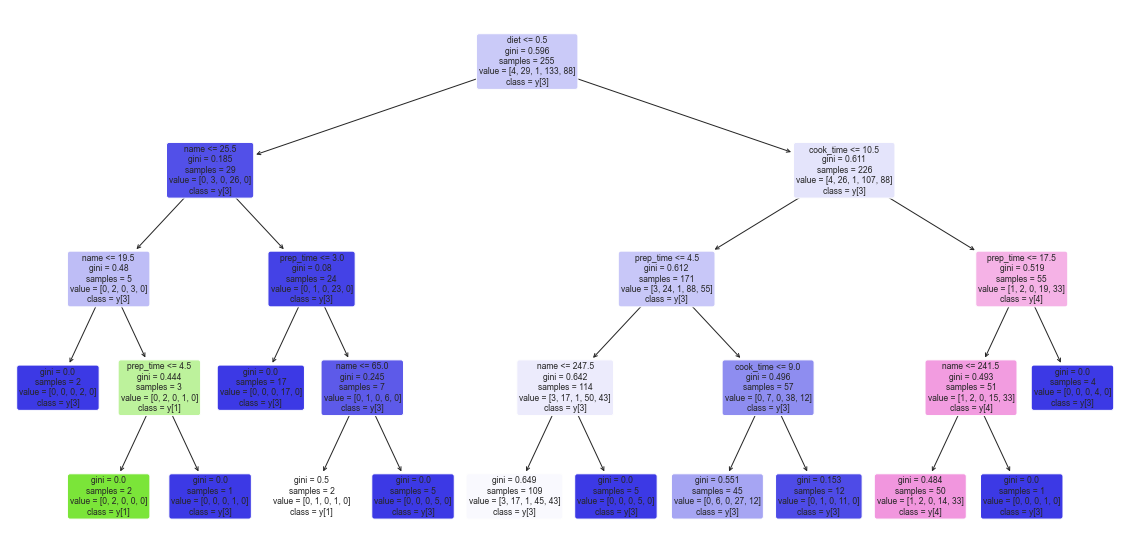

In [46]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained a decision tree model and named it 'regressor'
# You may need to adjust the model name and parameters based on your specific code
feature_cols=['prep_time','cook_time','name','diet']
# Generate textual representation of the decision tree
tree_rules = export_text(regressor, feature_names=feature_cols)
print(tree_rules)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=feature_cols, rounded=True, class_names=True)
plt.show()


## Accuracy Derived

In [47]:
accuracy = regressor.score(X_inn, y_pred)
print(f'The accuracy of the decision tree classifier is: {accuracy:.2f}')

The accuracy of the decision tree classifier is: 1.00


In [48]:
store_data = pd.read_csv(r"C:\Users\YATI\Downloads\indian_food.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8
0,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West


(256, 9)


# Pre-processing Data
## Here we need a data in form of list to apply Apriori Algorithm

In [49]:
records = []
for i in range(1, 256):
    records.append([str(store_data.values[i, j]) for j in range(1,2)])
print(records)

[['Maida flour, yogurt, oil, sugar'], ['Gram flour, ghee, sugar'], ['Carrots, milk, sugar, ghee, cashews, raisins'], ['Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom'], ['Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water'], ['Sugar syrup, lentil flour'], ['Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom'], ['Cashews, ghee, cardamom, sugar'], ['Milk, cottage cheese, sugar'], ['Milk, rice, sugar, dried fruits'], ['Gram flour, ghee, sugar'], ['Yogurt, milk, nuts, sugar'], ['Refined flour, besan, ghee, powdered sugar, yoghurt, green cardamom'], ['Firm white pumpkin, sugar, kitchen lime, alum powder'], ['Rice, sugar, nuts'], ['Condensed milk, sugar, spices, nuts'], ['Semolina, ghee, nuts, milk'], ['Khoa, coconut, molu leaf'], ['Corn flour, ghee, dry fruits'], ['Gram flour, ghee, sugar, milk, cardamom'], ['Chhena, sugar, ghee'], ['Chhena, sugar, milk'], ['Sugar, chenna cheese'], ['Fl

In [50]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Given dataset
#dataset = [['Maida flour, yogurt, oil, sugar'], ['Gram flour, ghee, sugar'], ['Carrots, milk, sugar, ghee, cashews, raisins'], ...]

# Flatten the list of lists
flattened_dataset = [item for sublist in records for item in sublist]

# Split ingredients into individual items
transaction_list = [item.split(', ') for item in flattened_dataset]

# Use TransactionEncoder to convert the list of ingredients into a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
ingredient_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(ingredient_df, min_support=0.0045, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Frequent Itemsets:")
print(frequent_itemsets)



Frequent Itemsets:
      support                                           itemsets
0    0.007843                                             (Aloo)
1    0.007843                                    (Arbi ke patte)
2    0.007843                                        (Arhar dal)
3    0.007843                                            (Besan)
4    0.007843                                      (Besan flour)
..        ...                                                ...
402  0.007843  (bengal gram flour, Arbi ke patte, gur, sesame...
403  0.007843  (bengal gram flour, Arbi ke patte, imli, sesam...
404  0.007843           (gur, sesame seeds, Arbi ke patte, imli)
405  0.007843       (gur, bengal gram flour, imli, sesame seeds)
406  0.007843  (bengal gram flour, Arbi ke patte, gur, sesame...

[407 rows x 2 columns]


##### Association Rules Derived

In [51]:
print("\nAssociation Rules:")
print(rules)
print("There are {} Relation derived.".format(len(rules)))
for i in range(0, len(rules)):
    print(rules['consequents'][i])


Association Rules:
              antecedents                                        consequents  \
0         (Arbi ke patte)                                (bengal gram flour)   
1         (Arbi ke patte)                                              (gur)   
2         (Arbi ke patte)                                             (imli)   
3                  (imli)                                    (Arbi ke patte)   
4         (Arbi ke patte)                                     (sesame seeds)   
..                    ...                                                ...   
320   (sesame seeds, gur)           (bengal gram flour, Arbi ke patte, imli)   
321           (gur, imli)   (bengal gram flour, Arbi ke patte, sesame seeds)   
322  (sesame seeds, imli)            (bengal gram flour, Arbi ke patte, gur)   
323       (Arbi ke patte)       (imli, bengal gram flour, gur, sesame seeds)   
324                (imli)  (bengal gram flour, Arbi ke patte, gur, sesame...   

     antecedent sup

# Rules Generated

In [52]:
for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {row['support']}")
    print(f"Confidence: {row['confidence']}")
    print(f"Lift: {row['lift']}")
    print("\n")

Rule: ['Arbi ke patte'] -> ['bengal gram flour']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 36.42857142857143


Rule: ['Arbi ke patte'] -> ['gur']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 42.5


Rule: ['Arbi ke patte'] -> ['imli']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 127.5


Rule: ['imli'] -> ['Arbi ke patte']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 127.5


Rule: ['Arbi ke patte'] -> ['sesame seeds']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 23.181818181818183


Rule: ['Arhar dal'] -> ['curry leaves']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 10.2


Rule: ['Besan flour'] -> ['ghee']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 10.2


Rule: ['Besan flour'] -> ['sugar']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 5.795454545454546


Rule: ['beans'] -> ['Chana dal']
Support: 0.00784313725490196
Confidence: 0.6666666666666666
Lift: 15.454545454545453


Rule: ['fresh coconut'] -> ['Chana dal']
Support: 0.0078431372549


Rule: ['sesame seeds', 'gur'] -> ['bengal gram flour', 'imli']
Support: 0.00784313725490196
Confidence: 0.6666666666666666
Lift: 85.0


Rule: ['bengal gram flour', 'imli'] -> ['sesame seeds', 'gur']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 85.0


Rule: ['bengal gram flour', 'sesame seeds'] -> ['gur', 'imli']
Support: 0.00784313725490196
Confidence: 0.6666666666666666
Lift: 85.0


Rule: ['sesame seeds', 'imli'] -> ['bengal gram flour', 'gur']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 85.0


Rule: ['imli'] -> ['bengal gram flour', 'gur', 'sesame seeds']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 127.5


Rule: ['bengal gram flour', 'Arbi ke patte', 'gur', 'sesame seeds'] -> ['imli']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 127.5


Rule: ['bengal gram flour', 'Arbi ke patte', 'gur', 'imli'] -> ['sesame seeds']
Support: 0.00784313725490196
Confidence: 1.0
Lift: 23.181818181818183


Rule: ['bengal gram flour', 'Arbi ke patte', 'imli', 'sesame seeds'] -> 